<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
(train_data,train_target),(test_data, test_target) =  keras.datasets.fashion_mnist.load_data()
train_data.shape

(60000, 28, 28)

In [ ]:
from tensorflow import keras
(train_data,train_target),(test_data, test_target) =  keras.datasets.cifar10.load_data()
train_data.shape,test_data.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
import numpy as np
[ np.where(train_target == i)[0][0]  for i in range(10)]
# np.where(train_target == 1)[0][0]

[np.int64(29),
 np.int64(4),
 np.int64(6),
 np.int64(9),
 np.int64(3),
 np.int64(27),
 np.int64(0),
 np.int64(7),
 np.int64(8),
 np.int64(1)]

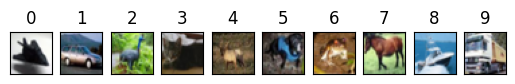

In [ ]:
import matplotlib.pyplot as plt
for id,index in enumerate([ np.where(train_target == i)[0][0]  for i in range(10)]):
  plt.subplot(1,10,id+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(id)
  plt.imshow(train_data[index])
plt.show()

# 컬러이미지에 대한 신경망 구현

In [ ]:
# 데이터를 표준화 0 ~ 1
train_data = train_data / 255.0  # 이미지의 픽셀의 유효범위가 0 ~ 255  0 ~ 1
test_data = test_data / 255.0
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(32,32,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,train_target,epochs=10,batch_size=128,validation_data=(test_data,test_target))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1814 - loss: 2.2092 - val_accuracy: 0.2967 - val_loss: 1.9894
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2992 - loss: 1.9685 - val_accuracy: 0.3213 - val_loss: 1.9117
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.3308 - loss: 1.8956 - val_accuracy: 0.3341 - val_loss: 1.8735
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3447 - loss: 1.8625 - val_accuracy: 0.3561 - val_loss: 1.8364
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3553 - loss: 1.8313 - val_accuracy: 0.3560 - val_loss: 1.8153
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3667 - loss: 1.8064 - val_accuracy: 0.3721 - val_loss: 1.7833
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3728 - loss: 1.7772 - val_accuracy: 0.3841 - val_loss: 1.7612
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3796 - loss: 1.7584 - val_ac

결과 시각화

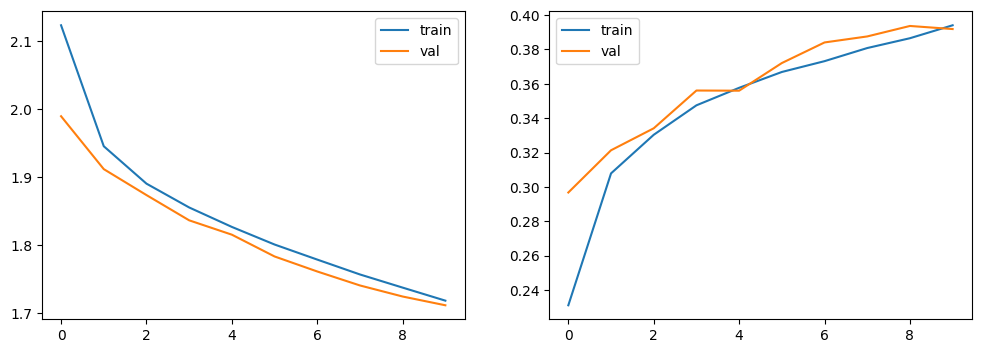

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

plt.show()

# 추론(예측)

In [ ]:
print(np.argmax(model.predict(test_data[:5]),axis = 1), test_target[:5])
print(model.evaluate(test_data,test_target))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[3 8 8 8 4] [[3]
 [8]
 [8]
 [0]
 [6]]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3934 - loss: 1.7080
[1.7115767002105713, 0.3919000029563904]


# CNN

In [ ]:
from tensorflow import keras
(train_data,train_target),(test_data, test_target) =  keras.datasets.cifar10.load_data()
train_data = train_data / 255.0  # 이미지의 픽셀의 유효범위가 0 ~ 255  0 ~ 1
test_data = test_data / 255.0
# conv2d 레이어를 추가
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(32,32,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))  # 30,30,32
model.add(keras.layers.MaxPool2D())  # 15,15,32  # stride를 주지 않으면 폴링사이즈와 같은 크기로 동작
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))  # 30,30,32
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
# FC, 분류기, 다층신경망
model.add(keras.layers.Flatten())  # 입력데이터를 1차원으로   15*15*32 = 7200
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,train_target,epochs=10,batch_size=128,validation_data=(test_data,test_target))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 161ms/step - accuracy: 0.3123 - loss: 1.8619 - val_accuracy: 0.4984 - val_loss: 1.3834
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 165ms/step - accuracy: 0.5125 - loss: 1.3529 - val_accuracy: 0.5549 - val_loss: 1.2380
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 163ms/step - accuracy: 0.5691 - loss: 1.2075 - val_accuracy: 0.6001 - val_loss: 1.1330
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 164ms/step - accuracy: 0.6087 - loss: 1.1095 - val_accuracy: 0.6167 - val_loss: 1.0834
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 159ms/step - accuracy: 0.6411 - loss: 1.0258 - val_accuracy: 0.6456 - val_loss: 1.0093
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 161ms/step - accuracy: 0.6642 - loss: 0.9536 - val_accuracy: 0.6572 - val_loss: 0.9675
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 155ms/step - accuracy: 0.6820 - loss: 0.9088 - val_accuracy: 0.6692 - val_loss: 0.9556
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 157ms/step - accuracy: 0.6946 - loss: 0

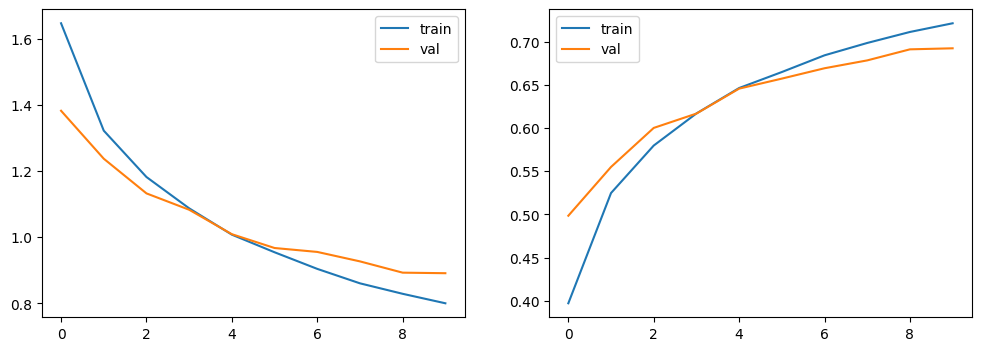

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

plt.show()

In [ ]:
print(np.argmax(model.predict(test_data[:5]),axis = 1), test_target[:5])
print(model.evaluate(test_data,test_target))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[3 8 8 0 6] [[3]
 [8]
 [8]
 [0]
 [6]]
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6992 - loss: 0.8857
[0.891136646270752, 0.692300021648407]


In [ ]:
input = keras.layers.Input(shape=(32,32,3))
hidden = keras.layers.Conv2D(32,(3,3),activation='relu')(input)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Conv2D(64,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Conv2D(64,(3,3),activation='relu')(hidden)
hidden = keras.layers.Flatten()(hidden)
hidden = keras.layers.Dense(64,activation='relu')(hidden)
output = keras.layers.Dense(10,activation='softmax')(hidden)
model_api = keras.models.Model(input,output)
model_api.summary()

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_api.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model_api.fit(train_data,train_target,epochs=2,batch_size=128,validation_data=(test_data,test_target))

Epoch 1/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 170ms/step - accuracy: 0.2983 - loss: 1.8949 - val_accuracy: 0.4870 - val_loss: 1.4032
Epoch 2/2
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 164ms/step - accuracy: 0.5110 - loss: 1.3590 - val_accuracy: 0.5289 - val_loss: 1.3077


In [ ]:
model_api.summary()

Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

In [ ]:
model_api.input, model_api.layers[5]

(<KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=False, name=keras_tensor_160>,
 <Conv2D name=conv2d_13, built=True>)

In [ ]:
conv_act1 = keras.models.Model(model_api.input, model_api.layers[1].output)
conv_act2 = keras.models.Model(model_api.input, model_api.layers[3].output)
conv_act3 = keras.models.Model(model_api.input, model_api.layers[5].output)

conv_output1 = conv_act1.predict(test_data[:1])
conv_output2 = conv_act2.predict(test_data[:1])
conv_output3 = conv_act3.predict(test_data[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


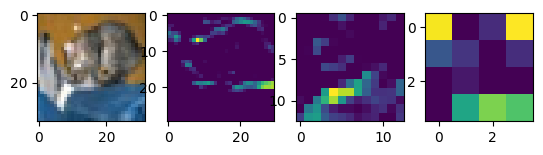

In [ ]:
plt.subplot(1,4,1)
plt.imshow(test_data[0])
plt.subplot(1,4,2)
plt.imshow(conv_output1[0,:,:,10])
plt.subplot(1,4,3)
plt.imshow(conv_output2[0,:,:,10])
plt.subplot(1,4,4)
plt.imshow(conv_output3[0,:,:,10])

# 정리...
```
신경망 Tensroflow
  입력층
  히든층 : 모델을 사용할때 외부에 입력과 출력만 노출이되서
  그 사이 층은 hidden layers
  출력층

모델 구성
1. Sequence([
  layers...
  layers...
]}
2. model = Sequnece()
model.add(layers....)
3. api
  input = keras.layers.Input()
  hidden = keras.layers......(input)
  hidden = keras.layers......(hidden)
  ....
  output = keras.layers......(hidden)
  model = Model(input,output)
    장점..
      중간레이어의 출력값을 다로 빼서 새로운 모델을 만들수 있고
      중간레이어 이후에 사용자가 따로만든 레이어를 합쳐서 새로운 모델 만들수 있다---> 전이학습(기존모델활용)
```

# 이미지 데이터

In [ ]:
import pathlib
import tensorflow as tf
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
str(data_dir)

'/root/.keras/datasets/flower_photos'

In [ ]:
from glob import glob
flowers = glob(str(data_dir) + '/**/*.jpg', recursive=True)
flowers[:5]

['/root/.keras/datasets/flower_photos/flower_photos/daisy/8619103877_d8c82c5f34_n.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/2331133004_582772d58f_m.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/5577555349_2e8490259b.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/16737503507_431768a927.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/7358085448_b317d11cd5.jpg']

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [121, 125, 128],
        [119, 123, 126],
        [118, 121, 126]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [125, 124, 130],
        [123, 124, 129],
        [120, 123, 128]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [121, 124, 129],
        [120, 123, 128],
        [118, 123, 127]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 60,  78,  88],
        [ 58,  78,  87],
        [ 59,  77,  87]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 62,  78,  91],
        [ 62,  78,  91],
        [ 62,  79,  89]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 65,  72,  88],
        [ 65,  72,  88],
        [ 65,  72,  88]]], dtype=uint8)
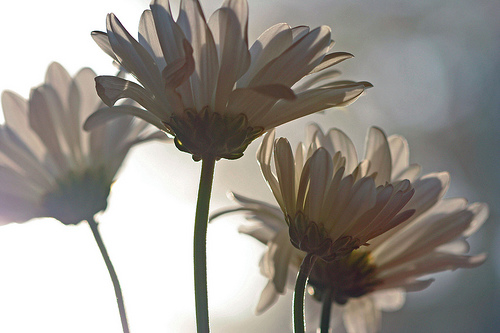

In [ ]:
# 이미지는 100 100
import PIL
import numpy as np
a = PIL.Image.open(flowers[20])
np.array(a)

In [ ]:
!pip install opencv-python
import cv2
img = cv2.imread(flowers[20])  # 이미지 읽기(수치화)
img = cv2.resize(img,(100,100)) # 사이즈 조정
img = img.flatten() / 255.0 #  0 ~ 1 스케일링
img

array([1.        , 1.        , 1.        , ..., 0.35294118, 0.30588235,
       0.24313725])

In [ ]:
# class의 개수
class_names = np.unique([i.split('/')[-2].strip() for i in flowers])
class_count = len(class_names)
print(class_names, class_count)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips'] 5


In [ ]:
# refactoring이 필요한 코드...
from tqdm import tqdm
datas = []
labels = []
for path in tqdm(flowers):
  if path.split('/')[-2] == 'daisy':
    img = cv2.imread(path)
    datas.append(cv2.resize(img,(100,100)))
    labels.append(0)
  elif path.split('/')[-2] == 'dandelion':
    img = cv2.imread(path)
    datas.append(cv2.resize(img,(100,100)))
    labels.append(1)
  elif path.split('/')[-2] == 'roses':
    img = cv2.imread(path)
    datas.append(cv2.resize(img,(100,100)))
    labels.append(2)
  elif path.split('/')[-2] == 'sunflowers':
    img = cv2.imread(path)
    datas.append(cv2.resize(img,(100,100)))
    labels.append(3)
  elif path.split('/')[-2] == 'tulips':
    img = cv2.imread(path)
    datas.append(cv2.resize(img,(100,100)))
    labels.append(4)
datas = np.array(datas)
labels = np.array(labels)
datas.shape, labels.shape

100%|██████████| 3670/3670 [00:10<00:00, 342.73it/s]


((3670, 100, 100, 3), (3670,))

In [ ]:
datas.shape

(3670, 100, 100, 3)

In [ ]:
# 모델은 함수형 api로 작성
from tensorflow import keras
input = keras.layers.Input(shape=(100,100,3))
hidden = keras.layers.Rescaling(1./255)(input)
# 특성 추출 ------------
hidden = keras.layers.Conv2D(16,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(32,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(64,(3,3),activation='relu')(hidden)
# 분류기 --------
hidden = keras.layers.Flatten()(hidden)
hidden = keras.layers.Dense(128,activation='relu')(hidden)
hidden = keras.layers.Dropout(0.5)(hidden)
output = keras.layers.Dense(class_count,activation='softmax')(hidden)

model_api = keras.models.Model(input,output)
model_api.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 98, 98, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 47, 47, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       3,612,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,637,029 (13.87 MB)

 Trainable params: 3,637,029 (13.87 MB)

 Non-trainable params: 0 (0.00 B)

array([[[ 62, 117,  92],
        [ 63, 118,  93],
        [ 64, 118,  95],
        ...,
        [ 64, 118,  95],
        [ 64, 118,  95],
        [ 64, 118,  95]],

       [[ 62, 116,  93],
        [ 62, 116,  93],
        [ 64, 118,  94],
        ...,
        [ 64, 118,  95],
        [ 64, 118,  95],
        [ 64, 118,  95]],

       [[ 62, 116,  93],
        [ 61, 114,  95],
        [ 64, 118,  94],
        ...,
        [ 62, 117,  94],
        [ 64, 118,  95],
        [ 64, 118,  95]],

       ...,

       [[ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98],
        ...,
        [ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98]],

       [[ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98],
        ...,
        [ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98]],

       [[ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98],
        ...,
        [ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98]]], dtype=uint8)
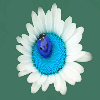

In [ ]:
datas[0]

In [ ]:
# 학습
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
datas_train,datas_test,labels_train,labels_test = train_test_split(datas,labels,test_size=0.2)
model_api.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜벡함수 적용
checkpoint_cb = ModelCheckpoint('fashion_mnist.keras',save_best_only=True,monitor='val_loss')
early_stopping_cb = EarlyStopping(patience=8,restore_best_weights=True,monitor='val_loss')
reduce_lr_cb = ReduceLROnPlateau(factor=0.1,patience=4,monitor='val_loss')

history = model_api.fit(datas_train,labels_train,epochs=100,batch_size=128,
                        validation_data=(datas_test,labels_test),
                        callbacks = [checkpoint_cb,early_stopping_cb,reduce_lr_cb])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.2480 - loss: 1.6845 - val_accuracy: 0.2956 - val_loss: 1.4860 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.3375 - loss: 1.4567 - val_accuracy: 0.4741 - val_loss: 1.2824 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4651 - loss: 1.2373 - val_accuracy: 0.5068 - val_loss: 1.1793 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5436 - loss: 1.1146 - val_accuracy: 0.5286 - val_loss: 1.1626 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5336 - loss: 1.1195 - val_accuracy: 0.5722 - val_loss: 1.1145 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5809 - loss: 1.0338 - val_accuracy: 0.5477 - val_loss: 1.0893 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6006 - loss: 0.9805 

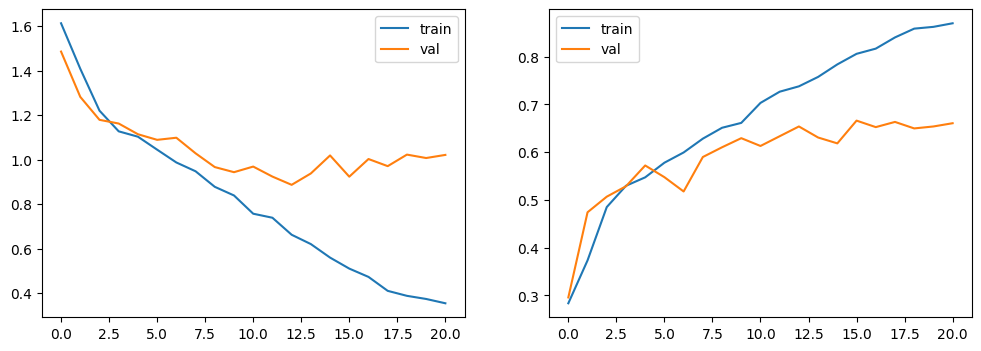

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

plt.show()

In [ ]:
model_api.evaluate(datas_test,labels_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6555 - loss: 0.8829


[0.8871521353721619, 0.6539509296417236]

# 성능개선을 하는 방법 ( 이미지 더 많이 확보)

In [ ]:
# 데이터 증강
data_agumentation = keras.Sequential([
  keras.layers.Input(shape=(100,100,3))  ,
  keras.layers.RandomFlip('horizontal'),
  keras.layers.RandomRotation(0.1),
  keras.layers.RandomZoom(0.1),
])

array([[[ 62, 117,  92],
        [ 63, 118,  93],
        [ 64, 118,  95],
        ...,
        [ 64, 118,  95],
        [ 64, 118,  95],
        [ 64, 118,  95]],

       [[ 62, 116,  93],
        [ 62, 116,  93],
        [ 64, 118,  94],
        ...,
        [ 64, 118,  95],
        [ 64, 118,  95],
        [ 64, 118,  95]],

       [[ 62, 116,  93],
        [ 61, 114,  95],
        [ 64, 118,  94],
        ...,
        [ 62, 117,  94],
        [ 64, 118,  95],
        [ 64, 118,  95]],

       ...,

       [[ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98],
        ...,
        [ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98]],

       [[ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98],
        ...,
        [ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98]],

       [[ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98],
        ...,
        [ 67, 118,  98],
        [ 67, 118,  98],
        [ 67, 118,  98]]], dtype=uint8)
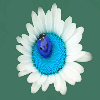

In [ ]:
datas[0]

(100, 100, 3) (1, 100, 100, 3)


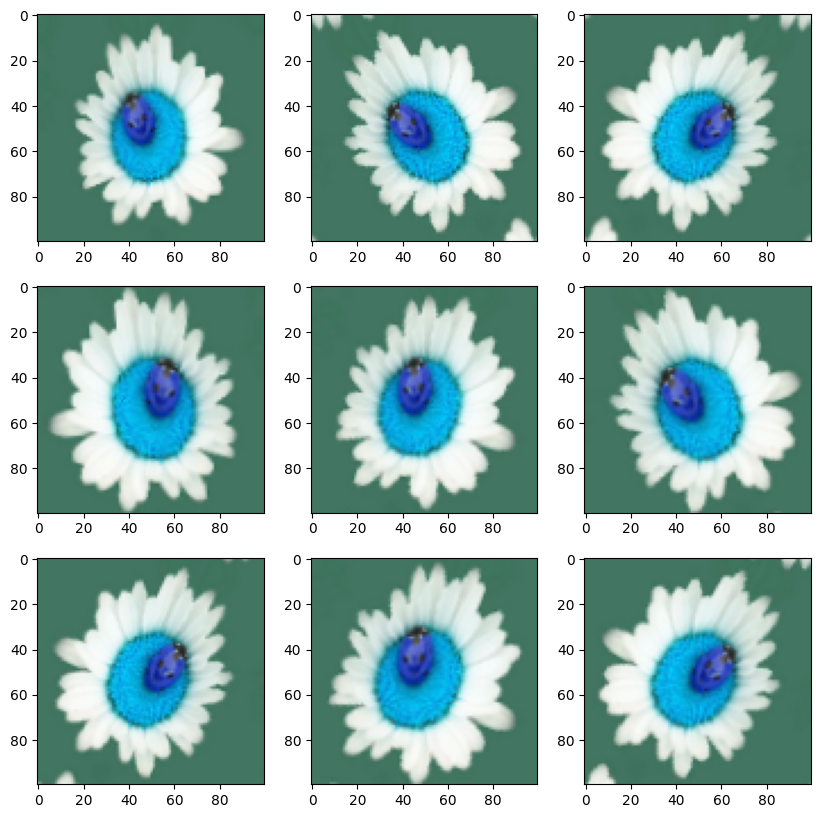

In [ ]:
print(datas[0].shape, datas[:1].shape)
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  agumented_images =  data_agumentation(datas[:1])  # 100 100 3  -> 1 100 100 3
  # 계산과정에서 픽셀의 값이 255를 초과하는 실수 값이 나올수 있으므로 정수로 변환한다
  img = agumented_images[0].numpy().astype('uint8')
  plt.imshow(img)

plt.show()

In [ ]:
# 모델은 함수형 api로 작성
from tensorflow import keras
# 데이터 증강
input = keras.layers.Input(shape=(100,100,3))
hidden = keras.layers.RandomFlip('horizontal')(input)
hidden = keras.layers.RandomRotation(0.1)(hidden)
hidden = keras.layers.RandomZoom(0.1)(hidden)

hidden = keras.layers.Rescaling(1./255)(hidden)
# 특성 추출 ------------
hidden = keras.layers.Conv2D(16,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(32,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(64,(3,3),activation='relu')(hidden)
# 분류기 --------
hidden = keras.layers.Flatten()(hidden)
hidden = keras.layers.Dense(128,activation='relu')(hidden)
hidden = keras.layers.Dropout(0.5)(hidden)
output = keras.layers.Dense(class_count,activation='softmax')(hidden)

model_api = keras.models.Model(input,output)
model_api.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_7 (RandomFlip)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_7 (RandomRotation)   │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_7 (RandomZoom)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_5 (Rescaling)              │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 98, 98, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 47, 47, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │       3,612,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,637,029 (13.87 MB)

 Trainable params: 3,637,029 (13.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
datas_train,datas_test,labels_train,labels_test = train_test_split(datas,labels,test_size=0.2)
model_api.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜벡함수 적용
checkpoint_cb = ModelCheckpoint('fashion_mnist.keras',save_best_only=True,monitor='val_loss')
early_stopping_cb = EarlyStopping(patience=8,restore_best_weights=True,monitor='val_loss')
reduce_lr_cb = ReduceLROnPlateau(factor=0.1,patience=4,monitor='val_loss')

history = model_api.fit(datas_train,labels_train,epochs=100,batch_size=128,
                        validation_data=(datas_test,labels_test),
                        callbacks = [checkpoint_cb,early_stopping_cb,reduce_lr_cb])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.2260 - loss: 1.9352 - val_accuracy: 0.2275 - val_loss: 1.5637 - learning_rate: 0.0010
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3174 - loss: 1.4939 - val_accuracy: 0.4223 - val_loss: 1.3852 - learning_rate: 0.0010
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4226 - loss: 1.3596 - val_accuracy: 0.4891 - val_loss: 1.2099 - learning_rate: 0.0010
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4377 - loss: 1.2770 - val_accuracy: 0.4646 - val_loss: 1.2402 - learning_rate: 0.0010
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4786 - loss: 1.2073 - val_accuracy: 0.5381 - val_loss: 1.1451 - learning_rate: 0.0010
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5083 - loss: 1.1780 - val_accuracy: 0.5913 - val_loss: 1.0786 - learning_rate: 0.0010
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5392 - loss: 1.1291 - 

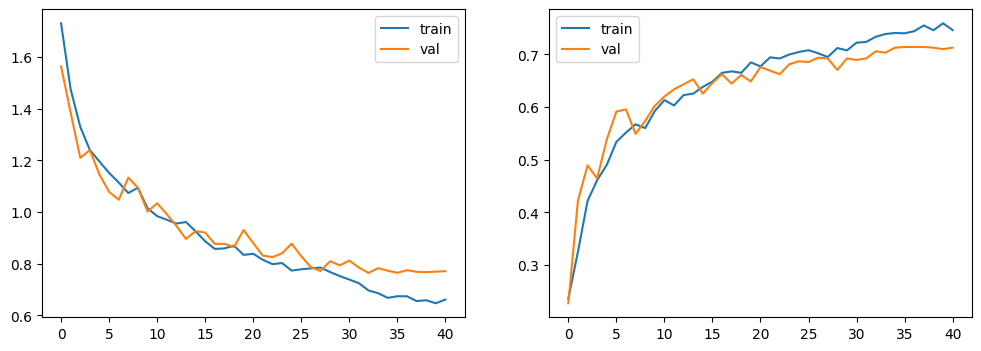

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

plt.show()

# 데이터를 폴더형태로 읽어서 학습과 검증 데이터 및 정답을 데이터세트로 만들기

In [ ]:
import pathlib
import tensorflow as tf
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
print(data_dir)

/root/.keras/datasets/flower_photos


In [ ]:
from glob import glob
glob('/root/.keras/datasets/flower_photos/**/*.jpg', recursive=True)

['/root/.keras/datasets/flower_photos/flower_photos/daisy/8619103877_d8c82c5f34_n.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/2331133004_582772d58f_m.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/5577555349_2e8490259b.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/16737503507_431768a927.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/7358085448_b317d11cd5.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/14307766919_fac3c37a6b_m.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/3285641623_da0e47f49a.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/15327813273_06cdf42210.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/16020253176_60f2a6a5ca_n.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/3117644024_1cbb59a509_n.jpg',
 '/root/.keras/datasets/flower_photos/flower_photos/daisy/4746633946_23933c0810.jpg',
 '/root/.keras/datasets/flower_photos/fl

In [ ]:

train_ds = tf.keras.utils.image_dataset_from_directory(
    str(data_dir) + '/flower_photos',
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    image_size=(100, 100),  # resize
    batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
    str(data_dir) + '/flower_photos',
    validation_split=0.2,
    subset="validation",
    seed=123,
    shuffle=True,
    image_size=(100, 100),  # resize
    batch_size=32)
train_ds.class_names

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
# 모델은 함수형 api로 작성
from tensorflow import keras
# 데이터 증강
input = keras.layers.Input(shape=(100,100,3))
hidden = keras.layers.RandomFlip('horizontal')(input)
hidden = keras.layers.RandomRotation(0.1)(hidden)
hidden = keras.layers.RandomZoom(0.1)(hidden)

hidden = keras.layers.Rescaling(1./255)(hidden)
# 특성 추출 ------------
hidden = keras.layers.Conv2D(16,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(32,(3,3),activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(64,(3,3),activation='relu')(hidden)
# 분류기 --------
hidden = keras.layers.Flatten()(hidden)
hidden = keras.layers.Dense(128,activation='relu')(hidden)
hidden = keras.layers.Dropout(0.5)(hidden)
output = keras.layers.Dense(class_count,activation='softmax')(hidden)

model_api = keras.models.Model(input,output)
model_api.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_9 (RandomFlip)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_9 (RandomRotation)   │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_9 (RandomZoom)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_7 (Rescaling)              │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 98, 98, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 49, 49, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 47, 47, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 28224)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │       3,612,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,637,029 (13.87 MB)

 Trainable params: 3,637,029 (13.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 학습
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
datas_train,datas_test,labels_train,labels_test = train_test_split(datas,labels,test_size=0.2)
model_api.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜벡함수 적용
checkpoint_cb = ModelCheckpoint('fashion_mnist.keras',save_best_only=True,monitor='val_loss')
early_stopping_cb = EarlyStopping(patience=8,restore_best_weights=True,monitor='val_loss')
reduce_lr_cb = ReduceLROnPlateau(factor=0.1,patience=4,monitor='val_loss')

history = model_api.fit(train_ds,epochs=100,batch_size=128,
                        validation_data=val_ds,
                        callbacks = [checkpoint_cb,early_stopping_cb,reduce_lr_cb])

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.2354 - loss: 1.8697 - val_accuracy: 0.3692 - val_loss: 1.4361 - learning_rate: 0.0010
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3962 - loss: 1.3702 - val_accuracy: 0.4741 - val_loss: 1.2476 - learning_rate: 0.0010
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4702 - loss: 1.2291 - val_accuracy: 0.5191 - val_loss: 1.1981 - learning_rate: 0.0010
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5322 - loss: 1.1588 - val_accuracy: 0.5395 - val_loss: 1.1356 - learning_rate: 0.0010
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5727 - loss: 1.0970 - val_accuracy: 0.5858 - val_loss: 1.0392 - learning_rate: 0.0010
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5884 - loss: 1.0349 - val_accuracy: 0.6213 - val_loss: 0.9758 - learning_rate: 0.0010
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5966 - loss: 1.0157 - 

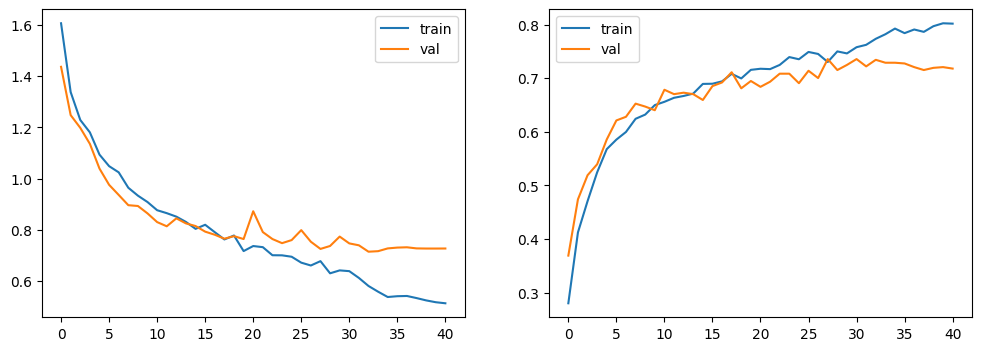

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

plt.show()

# auto tunning
```
cache() 데이터셋을 메모리 또는 디스크에 캐싱하여 빠르게 접근 가능
prefetch(buffer_size=AUTOTUNE) GPU가 학습하는동안 CPU가 데이터를 미리 준비
```

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 데이터 증강II

In [ ]:
!python --version

Python 3.11.11


In [ ]:
!pip list --format=freeze > requirements.txt